In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset1 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_1.csv')
dataset2 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_2.csv')
dataset3 = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/cluster_dataset_3.csv')

In [3]:
dataset1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0.611936,3.625010,1.701640,0.156916,-2.201926,2.785098,-0.628455,9.626628,9.444256,-4.056841,5.995159,-0.281087,1.154470,9.000359,-9.417610
1,1,1.357434,3.312884,3.073148,1.239251,-2.777790,3.843133,-2.153042,9.679152,10.798762,-3.776705,6.211661,0.507341,1.965051,8.984082,-7.759362
2,2,1.883790,3.717964,2.992826,0.643056,-0.553305,3.125165,-0.148614,8.775357,9.879644,-2.329409,4.844341,2.450292,1.119818,8.565278,-7.548463
3,3,-0.300719,5.141507,0.565156,-0.172551,-1.736033,3.522455,-2.991314,9.359687,11.136831,-1.039792,7.135197,1.496101,1.202091,7.547869,-10.570058
4,4,1.066001,4.418641,1.469452,1.196436,-1.304644,3.353065,-1.294004,7.885358,8.337725,-2.043782,6.194928,0.986047,-0.579824,9.956768,-8.386418


In [4]:
dataset2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,1.499547,4.132241,2.827058,1.721168,0.636332,4.254410,-1.617438,7.596081,10.372915,-1.675906
1,1,1.616402,2.686831,2.030941,0.159633,-1.246979,2.819732,-0.338077,8.152678,10.059583,-2.797589
2,2,0.031824,3.893738,2.038247,1.276815,0.732405,2.875625,-2.204201,7.489478,8.809659,-1.849688
3,3,-0.564527,4.367049,2.211774,1.129845,-2.124220,2.679961,-2.672317,7.342140,8.730394,-1.915120
4,4,-0.179912,5.084985,3.549752,-1.172321,-1.100645,3.594790,-1.885693,7.438188,9.140375,-2.628961


In [5]:
dataset3.head()

,Unnamed: 0,0,1
0,0,2.843828,3.326509
1,1,1.926358,4.152430
2,2,0.873051,4.714386
3,3,1.120314,5.758061
4,4,1.737308,4.425462


In [6]:
# Excluindo a coluna "Unnamed: 0"
dataset1.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset2.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset3.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# Normalizando os dados nos datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dataset1 = scaler.fit_transform(dataset1)
scaled_dataset2 = scaler.fit_transform(dataset2)
scaled_dataset3 = scaler.fit_transform(dataset3)


In [8]:
# Estimando a quantidade ideal de clusters para cada um dos datasests utilizando Método do Cotovelo

from sklearn.cluster import KMeans

# Função que prepara o algoritmo K-means e retorna o numero de clusters e o erro quadrático médio para cada qtd de clusters
def get_kmeans(n_clusters, dataset):
    model = KMeans(n_clusters=n_clusters)
    model.fit(dataset)
    return [n_clusters, model.inertia_]


In [9]:
# Aplicando a função get_kmeans em cada dataset variando o n_clusters entre 1 a 20. 
result_dataset1 = [get_kmeans(n_grupos, scaled_dataset1) for n_grupos in range(1,21)]
result_dataset2 = [get_kmeans(n_grupos, scaled_dataset2) for n_grupos in range(1,21)]
result_dataset3 = [get_kmeans(n_grupos, scaled_dataset3) for n_grupos in range(1,21)]

In [10]:
# Dataframes de resultados
df_result_dataset1 = pd.DataFrame(result_dataset1, columns = ['groups', 'inertia'])
df_result_dataset2 = pd.DataFrame(result_dataset2, columns = ['groups', 'inertia'])
df_result_dataset3 = pd.DataFrame(result_dataset3, columns = ['groups', 'inertia'])

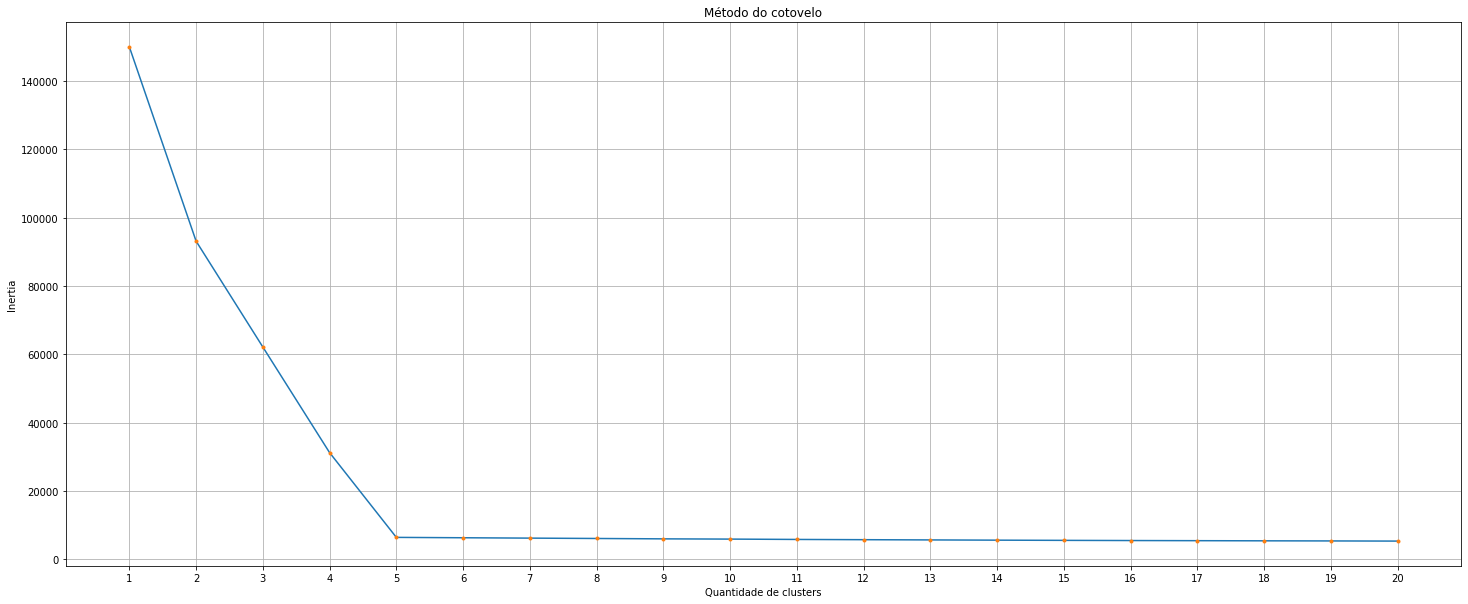

In [18]:
# Plot Result Dataset1 -> Aparentemente o ideal são 2 clusters.
plt.figure(figsize=(25,10))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inertia')
plt.grid()
plt.xticks(df_result_dataset1['groups'])
plt.plot(df_result_dataset1['groups'], df_result_dataset1['inertia'])
plt.plot(df_result_dataset1['groups'], df_result_dataset1['inertia'], '.')

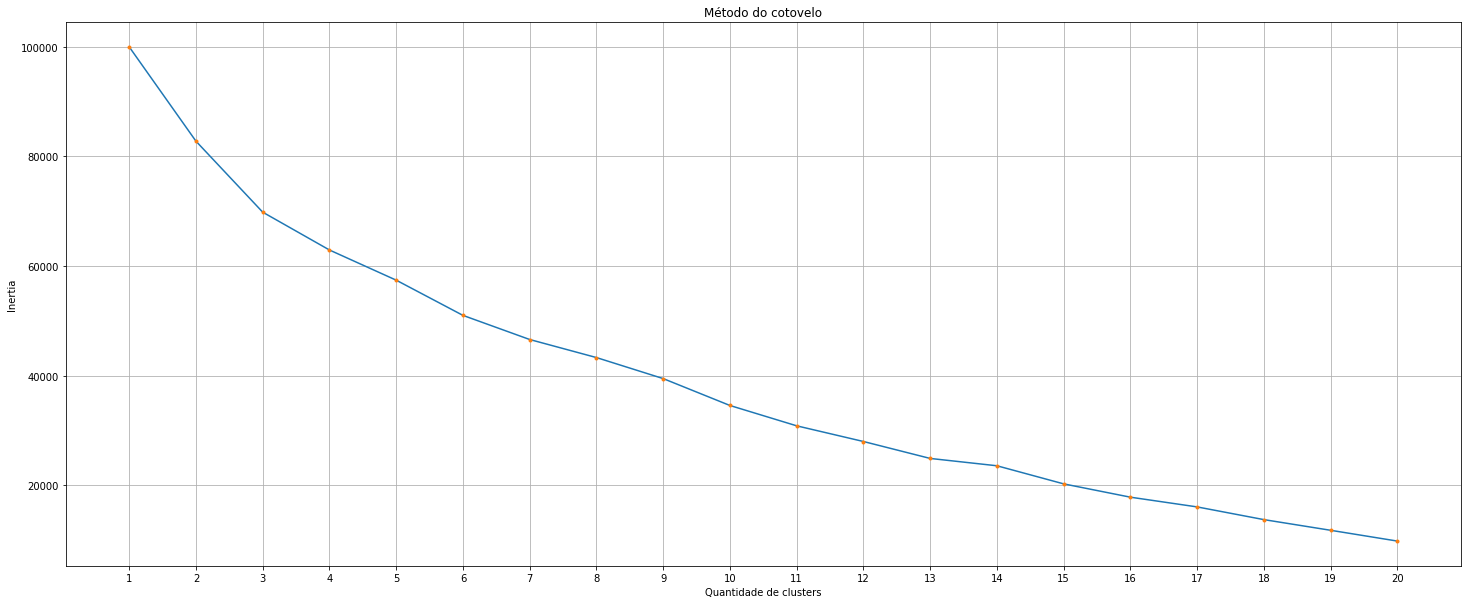

In [19]:
# Plot Result Dataset2 -> Aparentemente o ideal são 3 clusters.
plt.figure(figsize=(25,10))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inertia')
plt.grid()
plt.xticks(df_result_dataset2['groups'])
plt.plot(df_result_dataset2['groups'], df_result_dataset2['inertia']) 
plt.plot(df_result_dataset2['groups'], df_result_dataset2['inertia'], '.')

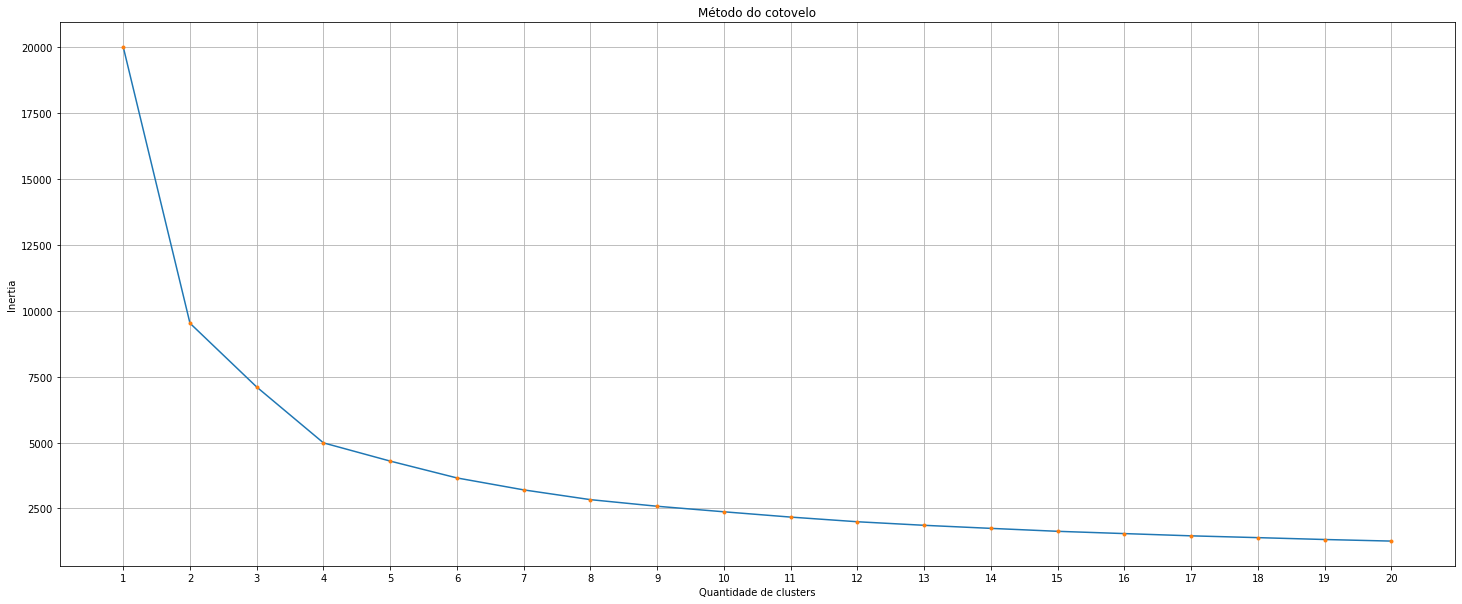

In [21]:
# Plot Result Dataset3 -> Aparentemente o ideal são 2 clusters, porém temos outro cotovelo com 4 clusters.
plt.figure(figsize=(25,10))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inertia')
plt.grid()
plt.xticks(df_result_dataset3['groups'])
plt.plot(df_result_dataset3['groups'], df_result_dataset3['inertia']) 
plt.plot(df_result_dataset3['groups'], df_result_dataset3['inertia'], '.')

In [22]:
# Preparando o modelo KMeans considerando 2 clusters.

model = KMeans(n_clusters=2)
model.fit(scaled_dataset3)
model.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [23]:
# Retornando o resultado da clusterização no dataset original (dataset3).
df_model_labels = pd.DataFrame(model.labels_)
df_dataset3_2clusters = pd.concat([dataset3, df_model_labels], axis=1)
df_dataset3_2clusters.columns = ['x','y','cluster']

In [24]:
df_dataset3_2clusters.head()

,x,y,cluster
0,2.843828,3.326509,0
1,1.926358,4.152430,1
2,0.873051,4.714386,1
3,1.120314,5.758061,1
4,1.737308,4.425462,1


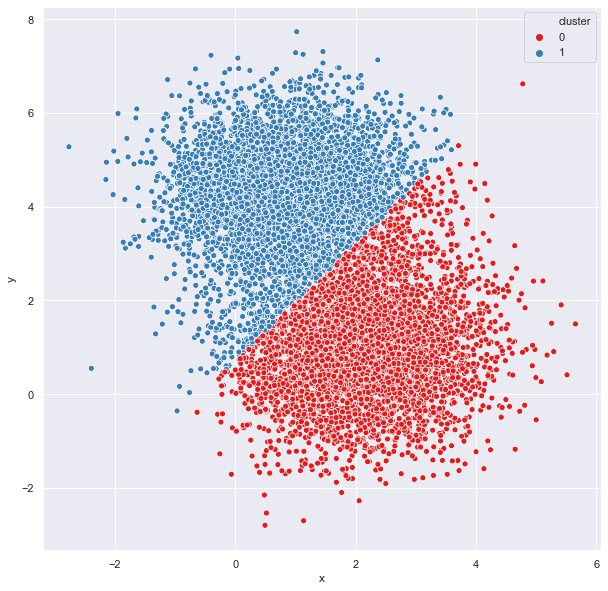

In [29]:
# Plot do resultado da clusterização para 2 clusters.
sns.set(rc={'figure.figsize': (10,10)})
sns.scatterplot(x='x', y='y', hue='cluster', palette=sns.color_palette('Set1', 2), data=df_dataset3_2clusters)

In [30]:
# Preparando o modelo KMeans considerando 4 clusters.
model = KMeans(n_clusters=4)
model.fit(scaled_dataset3)
model.labels_

array([2, 2, 0, ..., 3, 1, 1])

In [31]:
# Retornando o resultado da clusterização no dataset original (dataset3).
df_model_labels = pd.DataFrame(model.labels_)
df_dataset3_4clusters = pd.concat([dataset3, df_model_labels], axis=1)
df_dataset3_4clusters.columns = ['x','y','cluster']

In [32]:
df_dataset3_4clusters.head()

,x,y,cluster
0,2.843828,3.326509,2
1,1.926358,4.152430,2
2,0.873051,4.714386,0
3,1.120314,5.758061,2
4,1.737308,4.425462,2


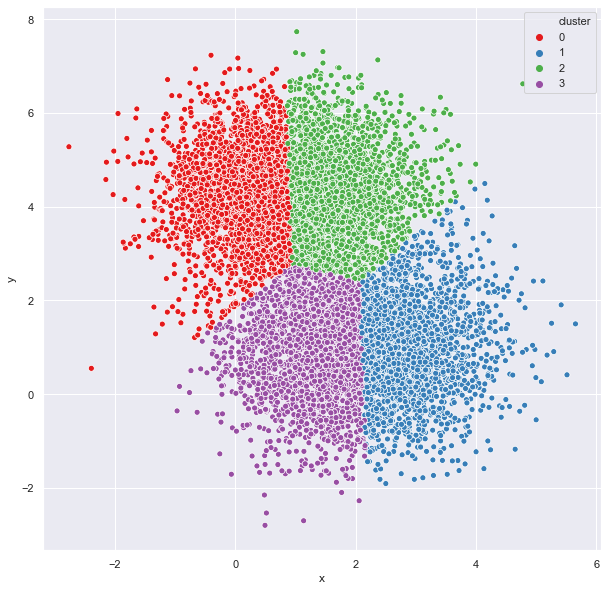

In [33]:
# Plot do resultado da clusterização para 4 clusters.
sns.set(rc={'figure.figsize': (10,10)})
sns.scatterplot(x='x', y='y', hue='cluster', palette=sns.color_palette('Set1', 4), data=df_dataset3_4clusters)